# Notebook 1: Polynomial Regression

Nnotebook basado en el artículo "Polynomial regression in Machine Learning : Understanding the Process" por hassane Skikri.

## 2.1 Fundamentos de la técnica
La **Regresión Polinomial** es un tipo de regresión lineal donde la relación entre la variable de entrada (X) y la variable de salida (y) se modela como un polinomio.

En lugar de ajustar los datos a una línea recta (como en la regresión lineal simple), se ajusta a una **línea curva**. Esto permite capturar patrones de datos más complejos y no lineales, como cuando una tendencia se acelera o se desacelera.

## 2.2 Modelo Matemático de la técnica

El modelo matemático para una regresión polinomial de grado 'n' se expresa con la siguiente fórmula:

$y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + ... + \beta_nx^n + \epsilon$

Donde:
* **$y$** es la variable dependiente (la que se quiere predecir).
* **$x$** es la variable independiente.
* **$\beta_0, \beta_1, ..., \beta_n$** son los coeficientes (parámetros) del modelo que se aprenden durante el entrenamiento.
* **$n$** es el grado del polinomio, que define la complejidad (curvatura) de la línea.
* **$\epsilon$** es el término de error.

## 2.3 Descripción de la librería, clases y funciones

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

**Librerías y Clases Empleadas:**

* **`numpy` (np):** Se utiliza para crear el conjunto de datos sintético (`np.arange()`).
* **`matplotlib.pyplot` (plt):** Es la librería principal para crear los gráficos de dispersión (`plt.scatter()`) y la línea de regresión (`plt.plot()`).
* **`sklearn.model_selection.train_test_split`:** Función para dividir los datos en conjuntos de entrenamiento y prueba, un paso crucial para evaluar el modelo.
* **`sklearn.preprocessing.PolynomialFeatures`:** Esta es la clase clave. Transforma la característica `X` en un conjunto de características polinómicas (`X`, $X^2$, $X^3$, etc.).
* **`sklearn.linear_model.LinearRegression`:** El modelo que se entrena con las características polinómicas.
* **`sklearn.pipeline.Pipeline`:** Se usa para encadenar múltiples pasos (transformación polinómica y regresión lineal) en un solo objeto.
* **`sklearn.model_selection.GridSearchCV`:** Herramienta fundamental para la **selección del modelo**. Prueba automáticamente múltiples grados de polinomio (del 1 al 4) y encuentra el mejor usando validación cruzada (`cv=4`).
* **`sklearn.metrics.mean_squared_error` (MSE):** Métrica de evaluación para medir el error del modelo.
* **`sklearn.metrics.r2_score` (R²):** Métrica de evaluación para medir qué tan bien se ajusta el modelo a los datos.

## 2.4 Pipeline

### Preprocesamiento

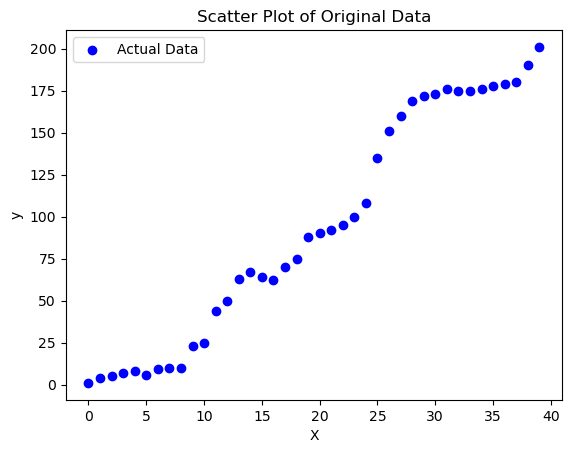

In [3]:
X = np.arange(0, 40)
y = [1, 4, 5, 7, 8, 6, 9, 10, 10, 23, 25, 44, 50, 63, 67, 64, 62, 70, 75, 88, 90, 92, 95, 100, 108, 135, 151, 160, 169, 172,173,176,175,175,176,178,179,180,190,201]
# First, let's plot the original data to see the relationship between X and y

plt.scatter(X, y, color='blue', label='Actual Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Original Data')
plt.legend()
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineering

Este proceso es manejado por la clase PolynomialFeatures. Esta clase tomará nuestra X y generará $X^2, X^3, X^4$, etc., según el grado que le pidamos. El artículo automatiza este proceso dentro de un Pipeline y GridSearchCV para encontrar el mejor grado de características.

### Model Selection

La razón formal para usar un modelo polinomial es que el gráfico de dispersión muestra una **clara curva**.

Para seleccionar el mejor grado de polinomio (¿$X^2$? ¿$X^3$?), el artículo utiliza una búsqueda en cuadrícula (GridSearchCV). Se probarán grados del 1 al 4 (np.arange(1, 5)) y se usará validación cruzada (cv=4) para encontrar el grado que mejor generalice, evitando el sobreajuste (overfitting).

In [5]:
# Setting up a pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Parameters for grid search

parameters = {'poly__degree': np.arange(1, 5)}

grid_search = GridSearchCV(pipeline, parameters, cv=4, scoring='neg_mean_squared_error')

### Model Training

El entrenamiento se realiza llamando a .fit() en el objeto GridSearchCV. Esto no solo entrena un modelo, sino que entrena múltiples modelos (4 grados * 4 folds = 16 entrenamientos) para encontrar el mejor.

Después, el artículo extrae el mejor grado y entrena un modelo final con esa configuración.

In [6]:
grid_search.fit(X_train.reshape(-1,1), y_train)

best_degree = grid_search.best_params_['poly__degree']


poly_best = PolynomialFeatures(degree=best_degree)
X_poly_train_best = poly_best.fit_transform(X_train.reshape(-1,1))
X_poly_test_best = poly_best.transform(X_test.reshape(-1,1))

model_best = LinearRegression()
model_best.fit(X_poly_train_best, y_train)

LinearRegression()

### Prediction

Con el model_best entrenado, ahora podemos hacer predicciones y visualizar la curva ajustada.

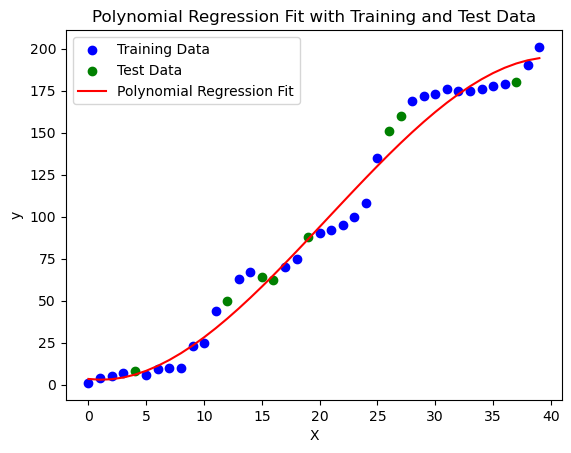

In [7]:
# Making predictions with the best model
predictions_train = model_best.predict(X_poly_train_best)
predictions_test = model_best.predict(X_poly_test_best)

# Gráfico de Dispersión con la Curva ajustada a los datos
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

X_range = np.arange(0, 40).reshape(-1,1)
X_range_poly = poly_best.transform(X_range)

predictions_range = model_best.predict(X_range_poly)

# Plotting the polynomial regression fit
plt.plot(X_range, predictions_range, color='red', label='Polynomial Regression Fit')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit with Training and Test Data')
plt.legend()
plt.show()

### Model Evaluation

Finalmente, evaluamos el rendimiento del modelo usando las métricas definidas en el artículo (MSE y R²) tanto en los datos de entrenamiento como en los de prueba.

In [9]:
# Evaluating the model
train_error = mean_squared_error(y_train, predictions_train)
test_error = mean_squared_error(y_test, predictions_test)
train_accuracy = r2_score(y_train, predictions_train)
test_accuracy = r2_score(y_test, predictions_test)

print("--- Evaluación del Modelo  ---")
print(f"Mejor Grado Encontrado: {best_degree}")
print(f"Error Cuadrático Medio (MSE): {test_error:.2f}")
print(f"Precisión (R²): {test_accuracy:.4f}")

--- Evaluación del Modelo (sobre datos de prueba) ---
Mejor Grado Encontrado: 3
Error Cuadrático Medio (MSE): 93.20
Precisión (R²): 0.9716


### Referencias bibliográficas (APA 7)

Skikri, H. (2024, 3 de febrero). *Polynomial regression in Machine Learning : Understanding the Process*. Medium. https://medium.com/@hassane.s/polynomial-regression-in-machine-learning-understanding-the-process-b804b4f305f